In [1]:
# Importing necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
# Data Set location in the local machine
dataset_dir = 'E:/OneDrive - TUNI.fi/Tampere University (MSc in CS-DS)/Year 2/Period 4/DATA.ML.200 Pattern Recognition and Machine Learning/Exercise_2/Data/GTSRB_subset_2'

In [3]:
# Defining some properties for the image
batch_size = 32
img_height = 64
img_width = 64

###  Split data into two parts - 80% for training and 20% for testing.

In [4]:
# Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 660 files belonging to 2 classes.
Using 528 files for training.


In [5]:
## Testing Data
test_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [6]:
# Checking the class names 
class_names = train_ds.class_names
print(class_names)

['class1', 'class2']


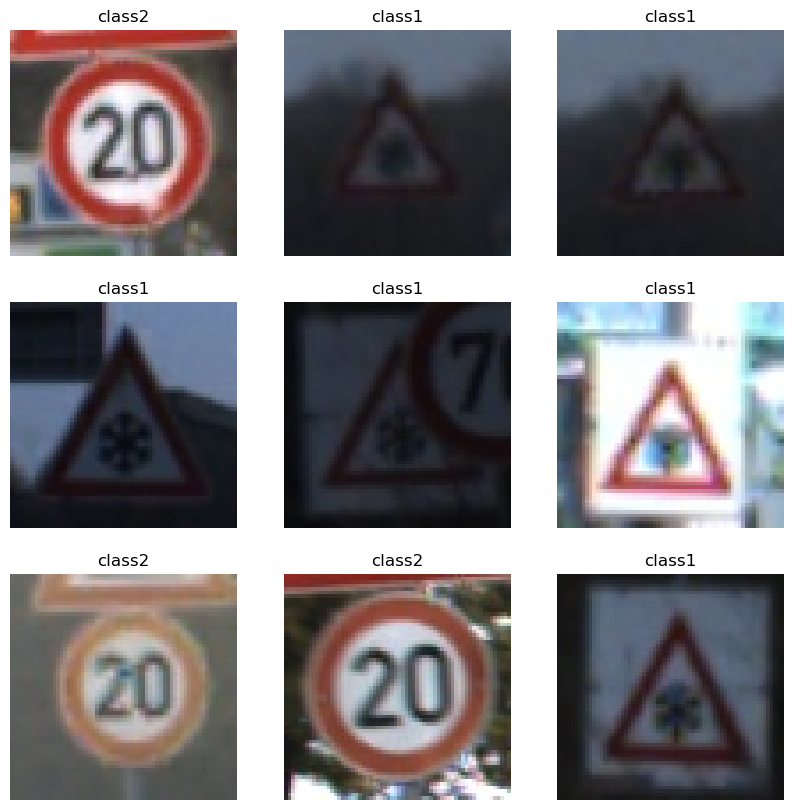

In [7]:
# Visualization
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
# Checking image properties
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 64, 64, 3)
(32,)


#### Normalizing

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
# Normalizing training dataset
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
train_image_batch, train_labels_batch = next(iter(normalized_train_ds))
first_image = train_image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.027450982 0.61960787


In [11]:
# # Normalizing test dataset
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
test_image_batch, test_labels_batch = next(iter(normalized_test_ds))
first_image = test_image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.027450982 0.7490196


#### Model 1

In [12]:
# Simple Sequential structure
model = tf.keras.models.Sequential()

# Flatten 2D input image to a 1D vector
model.add(tf.keras.layers.Flatten(input_shape=(64,64,3)))
print(model.output_shape)

# Add 1st full connected layer (hidden layer in MLP terminology)
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

# Add 2nd full connected layer (hidden layer in MLP terminology)
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

# Add the output layer of 2 full-connected neurons (As output only has 2 class)
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

print(model.summary())

(None, 12288)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 10)                122890    
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 123,022
Trainable params: 123,022
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(normalized_train_ds,
                    epochs=10)

Epoch 1/10


C:\Users\mahad\anaconda3\envs\DATAML200\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 [==============================] - 2s 76ms/step - loss: 0.8007 - accuracy: 0.3220
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.7206 - accuracy: 0.3371
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6806 - accuracy: 0.6174
Epoch 4/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6572 - accuracy: 0.6780
Epoch 5/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6420 - accuracy: 0.6780
Epoch 6/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6300 - accuracy: 0.6780
Epoch 7/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6205 - accuracy: 0.6780
Epoch 8/10
17/17 [==============================] - 0s 10ms/step - loss: 0.6127 - accuracy: 0.6780
Epoch 9/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6071 - accuracy: 0.6780
Epoch 10/10
17/17 [==============================] - 0s 11ms/step - loss: 0.6017 - accuracy: 0.6780


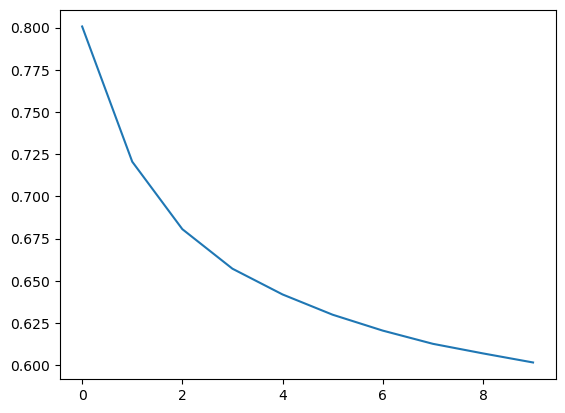

In [15]:
plt.plot(history.history['loss'])

In [16]:
result = model.evaluate(normalized_test_ds)
print("Test loss, Test accuracy : ", result)

5/5 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.6970
Test loss, Test accuracy :  [0.5885153412818909, 0.6969696879386902]


#### Model 2

In [17]:
# Simple Sequential structure
model = tf.keras.models.Sequential()

# Flatten 2D input image to a 1D vector
model.add(tf.keras.layers.Flatten(input_shape=(64,64,3)))
print(model.output_shape)

# Add 1st full connected layer (hidden layer in MLP terminology)
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

# Add 2nd full connected layer (hidden layer in MLP terminology)
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))

# Add the output layer of 2 full-connected neurons (As output only has 2 class)
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

print(model.summary())

(None, 12288)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 12288)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               1228900   
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,239,202
Trainable params: 1,239,202
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(normalized_train_ds,
                    epochs=10)

Epoch 1/10
17/17 [==============================] - 1s 18ms/step - loss: 0.6209 - accuracy: 0.6780
Epoch 2/10
17/17 [==============================] - 0s 17ms/step - loss: 0.5804 - accuracy: 0.6780
Epoch 3/10
17/17 [==============================] - 0s 18ms/step - loss: 0.5514 - accuracy: 0.6818
Epoch 4/10
17/17 [==============================] - 0s 17ms/step - loss: 0.5273 - accuracy: 0.6989
Epoch 5/10
17/17 [==============================] - 0s 18ms/step - loss: 0.5074 - accuracy: 0.6951
Epoch 6/10
17/17 [==============================] - 0s 18ms/step - loss: 0.4904 - accuracy: 0.7121
Epoch 7/10
17/17 [==============================] - 0s 18ms/step - loss: 0.4761 - accuracy: 0.7519
Epoch 8/10
17/17 [==============================] - 0s 18ms/step - loss: 0.4567 - accuracy: 0.7557
Epoch 9/10
17/17 [==============================] - 0s 17ms/step - loss: 0.4402 - accuracy: 0.8163
Epoch 10/10
17/17 [==============================] - 0s 18ms/step - loss: 0.4221 - accuracy: 0.8239


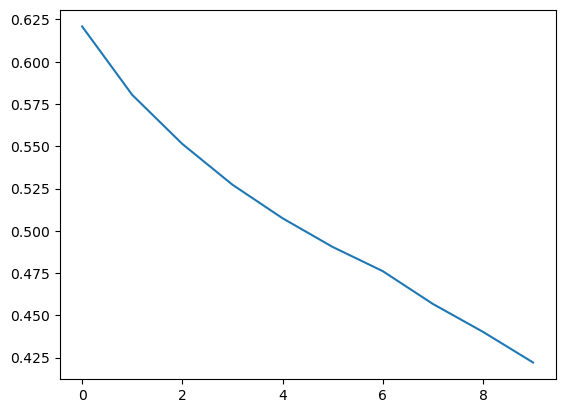

In [20]:
plt.plot(history.history['loss'])

In [21]:
result = model.evaluate(normalized_test_ds)
print("Test loss, Test accuracy : ", result)

5/5 [==============================] - 0s 6ms/step - loss: 0.4035 - accuracy: 0.8788
Test loss, Test accuracy :  [0.40346893668174744, 0.8787878751754761]


##### After increasing the neurons in the hidden layer it improves the accuracy